# 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
target = "quality"
table = pd.read_csv("Wine_2019.csv")

In [3]:
corr = table.corr()
relevant_features = abs(corr[target]).sort_values(ascending=False)
relevant_features

quality                 1.000000
fixed acidity           0.469078
free sulfur dioxide     0.462151
pH                      0.355839
alcohol                 0.290262
density                 0.225504
volatile acidity        0.213460
sulphates               0.176389
total sulfur dioxide    0.061752
chlorides               0.053384
residual sugar          0.023050
critric acid            0.003186
Name: quality, dtype: float64

(array([1.000e+00, 2.000e+00, 8.500e+01, 9.300e+02, 1.944e+03, 9.480e+02,
        9.000e+01]),
 array([2.        , 2.85714286, 3.71428571, 4.57142857, 5.42857143,
        6.28571429, 7.14285714, 8.        ]),
 <a list of 7 Patch objects>)

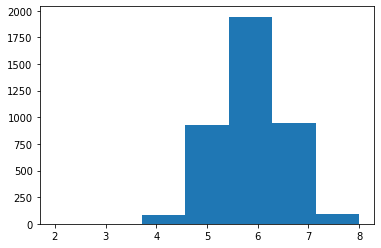

In [4]:
x = np.arange(2, 9, 1)
y = table[target]
plt.hist(y, bins=7)

In [5]:
def get_status(x) : 
    return pd.DataFrame([x.median(),x.mad(),x.var(),x.std(),x.skew(),x.kurt()],
                        index=['median','mad','var','std','skew','kurt'])

get_status(table[["fixed acidity","free sulfur dioxide"]])

,fixed acidity,free sulfur dioxide
median,9.169170,146.932329
mad,2.982667,71.434851
var,11.911030,6820.010017
std,3.451236,82.583352
skew,-0.026944,-0.003721
kurt,-1.189955,-1.199022


# 2

In [6]:
def choose_features(filename, features, target):
    """
    
    """
    table = pd.read_csv(filename)
#     features.append(target)
    return table[features + [target]]

In [7]:
features = ["density", "residual sugar", "volatile acidity"]

table = choose_features("Wine_2019.csv", features, target)

In [8]:
def Gradient_Descent_Algo(x, y, beta, alpha, m, NUM_ITERATION):
    xTrans = x.transpose()
    for i in range(0, NUM_ITERATION):
        loss_temp = np.dot(x, beta) - y
        loss = np.sum(np.square(loss_temp)) / (2 * m)
        loss_total[i]= loss
        # check iteration by
        # print("Iteration: {0} | Loss fucntion: {1}".format(i, loss))
        gradient = np.dot(xTrans, loss_temp) / m
        beta = beta - alpha * gradient
        beta_total[i,:]= beta.transpose()
        
    return beta

In [9]:
def print_loss_iteration(alpha):
    plt.figure()
    plt.plot(loss_total, label = "Loss function")
    plt.plot(beta_total[:,0], label = "Beta0")
    plt.plot(beta_total[:,1], label = "Beta1")
    plt.plot(beta_total[:,2], label = "Beta2")
    plt.legend(loc="upper right")
    plt.xlabel("Number of iteration")
    
    items = ["Alpha: ", str(alpha), " Loss function vs Iteration"]
    title = ''.join(items)
    plt.title(title)

In [10]:
# def table_2_array(table, features, target):
#     """
#     """
#     return np.array(table[features]), np.array(table[target]).reshape((-1,1))

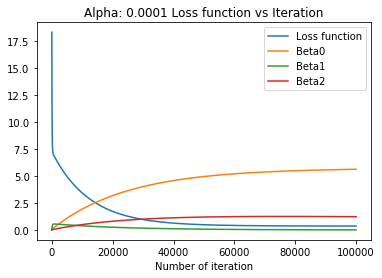

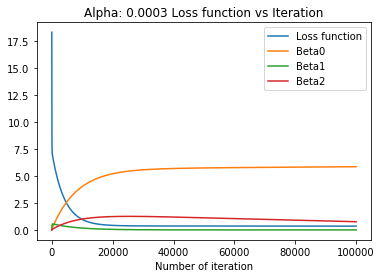

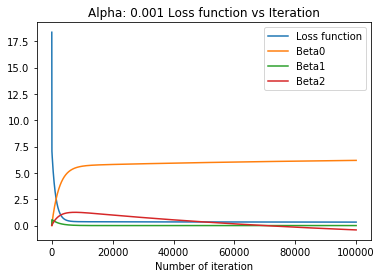

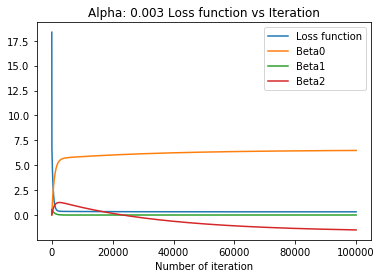

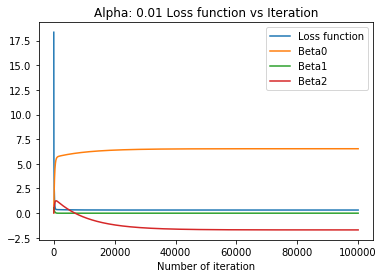

In [11]:
X, y = np.array(table[features]), np.array(table[target]).reshape((-1,1))

alphas = [0.0001, 0.0003, 0.001, 0.003, 0.01]

NUM_ITERATION = 100000
loss_total= np.zeros((NUM_ITERATION,1))
beta_total= np.zeros((NUM_ITERATION,3))
beta_initial = np.reshape(np.zeros(3),(3, 1))

for alpha in alphas:
    beta = Gradient_Descent_Algo(X, y, beta_initial, alpha, len(X), NUM_ITERATION)
    print_loss_iteration(alpha)


# 3

In [12]:
from sklearn.model_selection import train_test_split
# features = ["fixed acidity", "volatile acidity", "critric acid", "residual sugar", "chlorides", "free sulfur dioxide"
#            , "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

table = pd.read_csv("Wine_2019.csv")
X = table.iloc[:,:-1]
y = table.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [13]:
# def add_intercept(x):
#     """
#     """
#     x = np.column_stack((np.ones(len(x)), x))

In [14]:
# def lr_result(X_train, y_train, intercept):
#     """
#     """
    
#     lr = LinearRegression(fit_intercept = intercept)
#     lr.fit(centred_X_train, centred_y_train)

#     print("The coefficients of regression: \n ", lr.coef_)
#     print("The intercept of regression: \n", lr.intercept_)
    
#     return lr

In [15]:
# lr_intercept = lr_result(X_train, y_train, True)
# lr_no_intercept = lr_result(X_train, y_train, False)

# lr_intercept

In [16]:
from sklearn.linear_model import LinearRegression

lr_intercept = LinearRegression(fit_intercept = True)
lr_intercept.fit(X_train, y_train)

lr_no_intercept = LinearRegression(fit_intercept = False)
lr_no_intercept.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [17]:
def get_loss(x_test, y_test, intercept, coef):
    """
    """
    
    X_test_add_intercept = np.column_stack((x_test, np.ones(len(x_test))))
    coef_add_intercept = np.append(coef, intercept)
    
    model_0 = np.dot(X_test_add_intercept, coef_add_intercept)
    loss_temp = model_0 - y_test
    return np.sum(np.square(loss_temp)) / (2 * (len(X_test)))

In [18]:
print("The loss of regression with intercept: ",get_loss(X_test,y_test,lr_intercept.intercept_,lr_intercept.coef_))
print("The loss of regression without intercept: ",get_loss(X_test,y_test,lr_no_intercept.intercept_,lr_no_intercept.coef_))

The loss of regression with intercept:  0.04359632717193719
The loss of regression without intercept:  0.09889271550501949


# 4

In [19]:
centred = lambda x: x-x.mean()
centred_y_train = centred(y_train)
centred_X_train = centred(X_train)

In [20]:
lr_centred = LinearRegression()
lr_centred.fit(centred_X_train, centred_y_train)

print("The coefficients of regression with centred data: \n ", lr_centred.coef_)
print("The intercept of regression with centred data: \n", lr_centred.intercept_)


The coefficients of regression with centred data: 
  [ 1.05823626e-01 -1.82220918e+00 -1.32563254e-02  9.70940426e-02
 -6.60454061e-01  4.44903216e-03 -3.41427575e-04 -1.94164044e+02
  8.43092566e-01  6.29424065e-01  1.40861048e-01]
The intercept of regression with centred data: 
 6.282239153774318e-13


In [21]:
centred_X_test = centred(X_test)
centred_y_test = centred(y_test)

In [22]:
print("The loss of regression with centred data: ",get_loss(centred_X_test, centred_y_test, lr_centred.intercept_, lr_centred.coef_))



The loss of regression with centred data:  0.04359017151947683


# 5

In [23]:
bad_wine  = table[table['quality'] <= 6].sample(n=400, random_state=0)
good_wine  = table[table['quality'] >= 6].sample(n=400, random_state=0)

wine = pd.concat([good_wine,bad_wine])

In [24]:
from sklearn.linear_model import LassoCV

X = wine.iloc[:,:-1]
y = wine.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lascv = LassoCV(cv=5, random_state=0)
lascv.fit(X_train, y_train)

print("LASSO Lambda: {0}".format(lascv.alpha_))


LASSO Lambda: 0.02459743823688252


In [25]:
X = table.iloc[:,:-1]
y = table.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=lascv.alpha_)
clf.fit(X_train, y_train)


Lasso(alpha=0.02459743823688252, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
print("The coefficients of regression with centred data: \n ", clf.coef_)
print("The intercept of regression with centred data: \n", clf.intercept_)


The coefficients of regression with centred data: 
  [ 1.02640387e-01 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  4.39373505e-03 -4.06470956e-04 -0.00000000e+00
  6.57957986e-01  1.79953120e-01  1.27537490e-01]
The intercept of regression with centred data: 
 0.8389884384600421


In [28]:
print("The loss of regression with lasso: ", get_loss(X_test,y_test, clf.intercept_, clf.coef_))

The loss of regression with lasso:  0.13047548009378707
